NumPy(Numerical Python)，python 数值计算包。是所有 python 数据分析包的基础。
NumPy提供了大量的数值编程工具，可以方便地处理向量、矩阵等运算，极大地便利了人们在科学计算方面的工作[^1]。

NumPy 的主要功能包括：

- ndarray, 多维数组，支持快速的矢量运算和复杂广播能力（不同大小的数组之间的运算叫广播（broadcasting）)
- 随机数生成
- 标准数学函数，用于对这个数组的数据进行快速运算，无需自己编写循环
- 磁盘及内存 IO 工具
- 线性代数、傅里叶变换
- 提供通用数据接口和工具，便于集成其他语言( 如 C/C++ 等）

在数据分析时，很重要的功能包括：

- 用于数据整理和清理、子集构造和过滤、转换等快速的矢量化运算
- 常用的数组解法，如排序、唯一化、集合运算等
- 高效的描述统计和数据聚合/摘要运算
- 用于异构数据集的合并/连接运算的数据对齐和关系型数据运算
- 将条件逻辑表述为数组表达式（而不是带有if-elif-else分支的循环）
- 数据的分组运算（聚合、转换、函数应用等）。

这些功能 NumPy 都有提供，但是更基础。一般我们不直接使用 Numpy，而是通过 pandas 等包间接调用。


## 准备工作

In [2]:
%pylab inline
# import numpy as np
import pandas as pd
import json

Populating the interactive namespace from numpy and matplotlib


In [10]:
from __future__ import division

np.set_printoptions(precision=4, suppress=True)

## ndarray:  多维数组对象

ndarray 要求其中所有元素的类型必须相同。 

In [ ]:
data = randn(2, 3)

In [ ]:
data
data * 10
data + data

In [ ]:
data.shape
data.dtype

### 创建数组

- `np.array()` 
  将 Python 数组转换为 ndarray 数组
- `np.asarray()`
  ？
- `np.zeros()`
  元素全为0的数组
- `np.zeros_like()`
   创建一个与参数数组形状相同的全0数组
- `np.ones()`
  元素全为1的数组
- `np.ones_like()`
   创建一个与参数数组形状相同的全1数组
- `np.empty()`
  没有任何具体值的 ndarray 数组
- `np.empty_like()`
   创建一个与参数数组形状相同的全空数组
- `np.arange()`
  根据 Python 内置函数 range 创建数组
- `np.eye()`和`np.identity()`
   创建一个 NxN 的单位矩阵（对角线为1，其余全为0）
  

In [4]:
# 创建一维数组
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

In [5]:
# 创建多维数组
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [27]:
# 特殊数组

print('一维 zero 数组')
print(np.zeros(10))

print('二维空数组')
print(np.empty((2, 3)))

print('二维ones数组')
print(np.ones((3,2)))

print('序列数组')
print(np.arange(15))

print('[0, 1)区间的随机数数组')
print(np.random.rand(5))

一维 zero 数组
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
二维空数组
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
二维ones数组
[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
序列数组
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[0, 1)区间的随机数数组
[ 0.4498  0.8318  0.035   0.675   0.9597]


In [15]:
# 数组的属性
print(arr1.dtype)
print(arr2.dtype)
print(arr2.ndim)
print(arr2.shape)

float64
int64
2
(2, 4)


### 数组类型 `dtype`

In [25]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype)
print(arr2.dtype)

float64
int32


In [86]:
#  类型转换
# 调用astype总会创建一个新的数组（原始数组的一个拷贝），即使和原来的数据类型相同
float_arr = arr2.astype(np.float64)
float_arr

array([ 1.,  2.,  3.])

### 数组运算

In [32]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [34]:
arr - arr

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [37]:
arr * arr

array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.]])

In [39]:
arr ** 0.5

array([[ 1.    ,  1.4142,  1.7321],
       [ 2.    ,  2.2361,  2.4495]])

In [40]:
1 / arr

array([[ 1.    ,  0.5   ,  0.3333],
       [ 0.25  ,  0.2   ,  0.1667]])

###  索引(indexing) 和 切片(slicing)

索引即通过一个无符号整数值获取数组里的值。

切片即选择数组里某个片段。

In [43]:
arr = np.arange(10)
arr
arr[5]
arr[5:8]

arr[5:8] = 12  #  对切片的操作会改变原始数组
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [44]:
#  即使创建了新的变量也是如此。不会复制数据，只会改变源数据
arr_slice = arr[5:8]
arr_slice[1] = 12345
arr
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [45]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [48]:
# 这两种方式等价
arr2d[0][2]
arr2d[0, 2]

3

In [49]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [50]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [52]:
# 如果一定要复制数据，使用 `copy()`方法
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [53]:
arr3d[1, 0]

array([7, 8, 9])

#### 切片索引(Indexing with slices)

In [54]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [55]:
arr2d
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [56]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [57]:
arr2d[1, :2]
arr2d[2, :1]

array([7])

In [58]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [59]:
arr2d[:2, 1:] = 0

###  布尔索引

In [60]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = randn(7, 4)
names
data

array([[ 0.0811,  1.0996, -2.6783, -0.5158],
       [-0.5067, -1.7738, -1.793 ,  1.0596],
       [ 1.8766, -0.5277, -0.2344, -0.7429],
       [ 0.9576, -2.5491,  1.4975,  0.8165],
       [-0.1607,  1.1135,  0.8363,  1.006 ],
       [ 0.6853, -0.8449, -0.7045,  1.5061],
       [-0.9308,  0.1374,  0.3917, -0.0104]])

In [61]:
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [62]:
data[names == 'Bob']

array([[ 0.0811,  1.0996, -2.6783, -0.5158],
       [ 0.9576, -2.5491,  1.4975,  0.8165]])

In [63]:
data[names == 'Bob', 2:]
data[names == 'Bob', 3]

array([-0.5158,  0.8165])

In [68]:
names != 'Bob'
data[~(names == 'Bob')]

array([[-0.5067, -1.7738, -1.793 ,  1.0596],
       [ 1.8766, -0.5277, -0.2344, -0.7429],
       [-0.1607,  1.1135,  0.8363,  1.006 ],
       [ 0.6853, -0.8449, -0.7045,  1.5061],
       [-0.9308,  0.1374,  0.3917, -0.0104]])

In [ ]:
mask = (names == 'Bob') | (names == 'Will')
mask
data[mask]

In [69]:
data[data < 0] = 0
data

array([[ 0.0811,  1.0996,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  1.0596],
       [ 1.8766,  0.    ,  0.    ,  0.    ],
       [ 0.9576,  0.    ,  1.4975,  0.8165],
       [ 0.    ,  1.1135,  0.8363,  1.006 ],
       [ 0.6853,  0.    ,  0.    ,  1.5061],
       [ 0.    ,  0.1374,  0.3917,  0.    ]])

In [70]:
data[names != 'Joe'] = 7
data

array([[ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 0.    ,  0.    ,  0.    ,  1.0596],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 0.6853,  0.    ,  0.    ,  1.5061],
       [ 0.    ,  0.1374,  0.3917,  0.    ]])

###  花式索引(Fancy indexing)

花式索引是指利用整数数组进行索引。

与切片索引不同，* 花式索引总是将数据复制到新数组中 * 。

In [71]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [72]:
arr[[4, 3, 0, 6]]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [73]:
arr[[-3, -5, -7]]

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

In [74]:
# more on reshape in Chapter 12
arr = np.arange(32).reshape((8, 4))
arr
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [75]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [76]:
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### 数组转置和轴对换

转置(transpose)，是一种对源数据的视图，不会进行复制。

In [88]:
arr = np.arange(15).reshape((3, 5))
print(arr)
print('-------')
print(arr.T)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
-------
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


`np.dot()`: 矩阵乘积

In [93]:
arr = np.arange(6).reshape((2,3))
print(arr)
print('-------')
print(arr.T)
print('-------')
print(np.dot(arr.T, arr))

[[0 1 2]
 [3 4 5]]
-------
[[0 3]
 [1 4]
 [2 5]]
-------
[[ 9 12 15]
 [12 17 22]
 [15 22 29]]


In [94]:
# 多维的情况比较复杂
arr = np.arange(16).reshape((2, 2, 4))
print(arr)
print('--------')
print(arr.transpose((1, 0, 2)))

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
--------
[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]


交换坐标轴

In [95]:
print(arr)
print('--------')
print(arr.swapaxes(1, 2))

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
--------
[[[ 0  4]
  [ 1  5]
  [ 2  6]
  [ 3  7]]

 [[ 8 12]
  [ 9 13]
  [10 14]
  [11 15]]]


## 通用函数：快速的元素级数组函数

NumPy 中的通用函数(ufunc), 可以对ndarray中的数据逐个执行运算。

常见的 ufunc 包括：
 
#### 一元 ufunc

- abs、fabs： 计算绝对值。对于非复数，fabs 更快
- sqrt: 平方根
- square: 平方
- exp: e^x
- log, log10, log2:  底数为 e,10,2的对数
- log1p: log(1+x)
- sign: 符号。（返回1，0，-1)
- cell: ceiling 值，即>=x 的最小整数
- floor: floor 值，即<=x 的最大整数
- rint: 四舍五入的整数，保留 type
- modf: 将小数和整数部分返回两个独立数组
- isnan: 返回是否为 非数字(NaN)的布尔数组
- isfinite, isinf: 返回是否为有穷(非 inf,非 NaN) / 无穷 的布尔数组
- cos, cosh, sin, sinh, tan, tanh: 三角函数
- arcos, arccosh, arcsin, arcsinh, arctan, arctanh: 反三角函数
- logical_not: 计算 非， 相当于 `~attr`


####  二元 ufunc

//TODO:

In [81]:
arr = np.arange(10)
np.sqrt(arr)
np.exp(arr)

array([    1.    ,     2.7183,     7.3891,    20.0855,    54.5982,
         148.4132,   403.4288,  1096.6332,  2980.958 ,  8103.0839])

In [83]:
x = randn(8)
y = randn(8)
x
y

#  以两个数组为参数，并返回数组
np.maximum(x, y) # element-wise maximum

array([ 0.28  ,  0.5968,  0.411 ,  1.2473,  0.6441,  3.7458, -0.3028,
        0.0777])

In [85]:
arr = randn(7) * 5

# 返回两个数组
np.modf(arr)

(array([-0.5937,  0.9759,  0.1092,  0.307 ,  0.2041,  0.053 ,  0.0242]),
 array([-4.,  3.,  0.,  7.,  7.,  2.,  0.]))

## 利用数组进行数据处理

矢量化数组运算比纯pyhton方式快1-2个数量级（or more）, 因为broadcasting作用很强大。

In [96]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

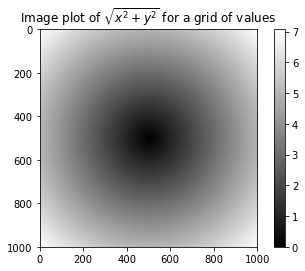

In [98]:
from matplotlib.pyplot import imshow, title
import matplotlib.pyplot as plt
z = np.sqrt(xs ** 2 + ys ** 2)
z
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### 将条件逻辑表述为数组运算

`np.where()`: x if condition else y 的矢量版

In [100]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [101]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

In [102]:
result = np.where(cond, xarr, yarr)
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

In [103]:
arr = randn(4, 4)
arr
np.where(arr > 0, 2, -2)
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-0.0841, -0.5415, -0.3519, -0.0315],
       [-0.4407,  2.    , -1.1352,  2.    ],
       [-0.0242,  2.    , -0.8126,  2.    ],
       [-1.7144, -2.0976, -0.3619, -0.5783]])

In [105]:
# 更复杂的用法
# result = 1 * cond1 + 2 * cond2 + 3 * -(cond1 | cond2)

# np.where(cond1 & cond2, 0,
#    np.where(cond1, 1, 
#    np.where(cond2, 2, 3)))

### 数学和统计方法

##### 常用的统计计算

- sum: 求和
- mean: 算术平均数
- min, max: 最小值、最大值
- argmin, argmax: 最小元素、最大元素的索引
- std,var: 标准差和方差
- cumsum:  所有元素的累计和
- cumprod:  所有元素的累计积

用于布尔数组时，
 
- sum: 用于 True 的加和
- any: 是否存在 True
- all: 是否全为 True

排序和唯一化


##### 常用集合运算

- sort: 排序
- unique: 唯一化，返回有序结果
- intersect1d(x,y): 计算公共元素，返回有序结果
- union1d(x,y): 计算并集，返回有序结果
- in1d(x,y):  返回关于“x数组中的元素是否在y中” 的布尔数组
- setdiff1d(x,y): 集合的差，返回元素在 x 中且不在 y 中的数组
- setxor1d(x,y):  集合异或，返回元素在一个集合中但不同时在两个集合中的数组

这些运算可以使用参数axis表示对哪个维度计算

In [3]:
arr = np.random.randn(5, 4) # 正态分布数据
print(arr.mean())#等价于 np.mean(arr)
print(arr.sum())

-0.396496459415
-7.9299291883


In [5]:
print(arr.mean(axis=1)) #
print(arr.sum(0))

[-0.64956646 -0.11051716 -0.15849652 -0.62669822 -0.43720393]
[-4.4768861  -1.13397655  1.23167117 -3.55073771]


In [10]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(arr.cumsum(0))
print('-------')
print(arr.cumprod(1))

[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
-------
[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


### Methods for boolean arrays

In [11]:
arr = randn(100)
(arr > 0).sum() # Number of positive values

48

In [12]:
bools = np.array([False, False, True, False])
bools.any()
bools.all()

False

### Sorting

In [13]:
arr = randn(8)
arr
arr.sort()
arr

array([-1.44379493, -1.00480601, -0.85448292, -0.81900953, -0.34626339,
        0.51552924,  0.91006618,  1.64684261])

In [14]:
arr = randn(5, 3)
arr
arr.sort(1)
arr

array([[ 0.07787912,  0.2126551 ,  1.11128042],
       [-0.66499524,  0.14805099,  0.80263139],
       [-1.16102765, -0.68351397, -0.00972547],
       [-2.93358171, -1.31426926, -0.17672943],
       [-1.37254879, -1.30564166,  0.64966682]])

In [15]:
large_arr = randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.7359669942395233

### Unique and other set logic

In [17]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
print(np.unique(ints))

['Bob' 'Joe' 'Will']
[1 2 3 4]


In [18]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [19]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

##  保存和读取数组文件（二进制）

In [20]:
arr = np.arange(10)
np.save('some_array', arr)

In [21]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
np.savez('array_archive.npz', a=arr, b=arr)  #  压缩保存

In [26]:
arch = np.load('array_archive.npz')  # 解压读取
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
!rm some_array.npy
!rm array_archive.npz

### 保存和读取文本文件

In [27]:
!cat array_ex.txt

cat: array_ex.txt: No such file or directory


In [ ]:
arr = np.loadtxt('array_ex.txt', delimiter=',')
arr

## 线性代数 (Linear algebra)

NumPy 的linalg中有很多关于矩阵的函数，与MATLAB、R使用的是相同的行业标准级Fortran库。

常用的函数包括：

- diag 返回方阵的对角线/非对角线元素数组，或者将一位数组转换为方阵
- dot  矩阵相乘
- trace 计算对角线元素之和
- det 计算矩阵行列式
- eig 计算方阵的本征值和本征向量
- inv 计算方阵的逆
- pinv 计算矩阵的 Moore-Penrose 伪逆
- qr 计算 QR 分解
- svd 计算奇异值分解(SVD)
- solve  解线性方程组 Ax=b, 其中 A 为一个方阵
- lstsq 计算 Ax=b 的最小二乘解

In [28]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)  # equivalently np.dot(x, y)

array([[  28.,   64.],
       [  67.,  181.]])

In [29]:
np.dot(x, np.ones(3))

array([  6.,  15.])

In [30]:
np.random.seed(12345)

In [31]:
from numpy.linalg import inv, qr
X = randn(5, 5)
mat = X.T.dot(X)
inv(mat)
mat.dot(inv(mat))
q, r = qr(mat)
r

array([[ -6.92714002,   7.38899524,   6.12272905,  -7.11625341,
         -4.92150833],
       [  0.        ,  -3.97347612,  -0.86707993,   2.97472904,
         -5.74024113],
       [  0.        ,   0.        , -10.26810228,   1.89090298,
          1.60790112],
       [  0.        ,   0.        ,   0.        ,  -1.29964934,
          3.35772244],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.55705805]])

## 生成随机数

NumPy.random模块对Python内置的random进行了补充，增加了一些用于高效生成多种概率分布的样本值的函数。

常用的函数包括：

- seed
- permutation
- shuffle
- rand
- randint
- randn
- binomial
- normal
- beta
- chisquare
- gamma
- uniform

In [32]:
samples = np.random.normal(size=(4, 4))
samples

array([[  1.24121276e-01,   3.02613562e-01,   5.23772068e-01,
          9.40277775e-04],
       [  1.34380979e+00,  -7.13543985e-01,  -8.31153539e-01,
         -2.37023165e+00],
       [ -1.86076079e+00,  -8.60757398e-01,   5.60145293e-01,
         -1.26593449e+00],
       [  1.19827125e-01,  -1.06351245e+00,   3.32882716e-01,
         -2.35941881e+00]])

In [37]:
from np.random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in xrange(N)]
%timeit np.random.normal(size=N)

ModuleNotFoundError: No module named 'np'

##  示例：随机漫步

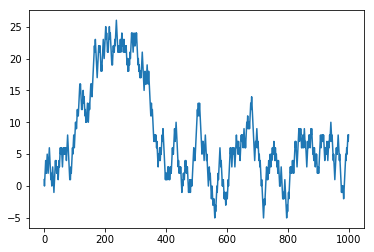

In [9]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
plt.plot(walk)

In [10]:
print(walk.min())
print(walk.max())
print((np.abs(walk) >= 10).argmax())

-5
26
103


###  一次模拟多个随机漫步

 ...]

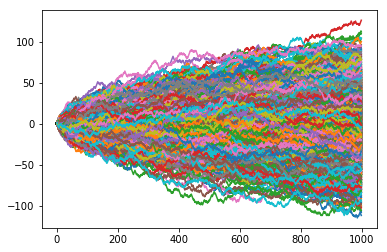

In [3]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
X = range(1000)
plt.plot(X,walks.T)

In [4]:
print(walks.max())
print(walks.min())

126
-115


In [5]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

3384

In [6]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

503.45390070921985

In [8]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))
steps

array([[ 0.03286574, -0.45207339,  0.17026854, ...,  0.27212713,
        -0.31667164,  0.27444454],
       [ 0.01559133,  0.38612333, -0.0041582 , ...,  0.20513382,
        -0.27255838,  0.24467084],
       [ 0.31672773, -0.1436589 ,  0.19202007, ...,  0.55997996,
        -0.04651806, -0.20882187],
       ..., 
       [ 0.21754568, -0.0075774 ,  0.06407988, ...,  0.21964187,
         0.38577389, -0.15963637],
       [ 0.17128004, -0.45363438,  0.20921587, ...,  0.05007464,
        -0.3100797 , -0.32913814],
       [-0.08854988, -0.07950819, -0.23258406, ...,  0.04237744,
         0.1356457 , -0.0150747 ]])

## 参考资料

- [^1]: [一大波金融Library来袭之numpy篇](https://uqer.io/community/share/54ca15f9f9f06c276f651a56)
- [^2]: [司空格子Ored 的笔记](http://www.cnblogs.com/batteryhp/p/5000104.html)